# <h1 style='text-align : center; color:green'> 911 Calls Project </h1> <br>
<p style='float:right'> Aamir Mohiuddin Malla </p>

---

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


### Data and SetUp
---

In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read and Check Data
---

In [3]:
#Dataframe
CallsData = pd.read_csv('Datasets/911.csv')

In [4]:
#Copy the Original Dataset
df = CallsData.copy(deep = True)

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Some Basic Questions
---

**1. Top 5 zipcodes for 911 Calls**

In [7]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**2. What are the top 5 townships(twp) for 911 Calls?**

In [8]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**3. How many unique title codes are there?**

In [9]:
df['title'].nunique()

110

In [10]:
#or we can do this as
len(df['title'].unique())

110

### Creating New Features
---

**4.** *In the **titles** column there are "Reason/Deppt" specified. These are EMS, Fire and Traffic. Based on this information we can create a new column of "Reasons" that contains coressponding reason string value.*

*E.g: If the title column value is EMS: BACK PAINS/INJURY, the Reason Column value would be EMS*

In [11]:
df['Reasons'] = df['title'].apply(lambda x : x.split(':')[0])

In [12]:
#check new column
df['Reasons']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reasons, Length: 99492, dtype: object

**5. What is the Most Common Reason for a 911 call based of this new Reason column?**

In [13]:
df['Reasons'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

In [14]:
#unique values in Reason
df['Reasons'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

### Visualizing the Information
---

**6. Number of Calls Count based on Reason.** 

[Text(0.5, 0, 'Reason of Call'),
 Text(0, 0.5, 'No.Of Calls'),
 Text(0.5, 1.0, 'Reasons and Calls')]

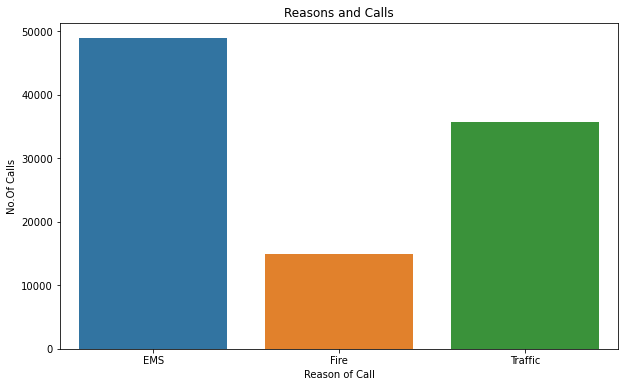

In [15]:
plt.figure(figsize=(10,6))
fig = sns.countplot(x='Reasons',data=df)
fig.set(xlabel="Reason of Call", ylabel="No.Of Calls", title="Reasons and Calls")

### Time Based Information
---

Let's Check first What is the data type of the objects in the timeStamp Column.

In [16]:
type(df['timeStamp'].iloc[0])

str

**7.** Since the datatype of the column is 'String', so we cannot perform the time based operation on it. We need to convert it to DateTime object, for that we will use *pd.to_datetime*

In [17]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [18]:
# checking type again now
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
# now we can grab certain information from it, such as
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [20]:
#time.hour
#time.month
time.year

2015

**8. Creating 3 New columns viz Hour, Month and Day of Week based on timeStamp Column which is now of type DateTime Object.**

In [21]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x : x.dayofweek)

In [22]:
# lets check the new columns in df
df[['timeStamp','Hour','Month','Day of Week']].head()

,timeStamp,Hour,Month,Day of Week
0,2015-12-10 17:40:00,17,12,3
1,2015-12-10 17:40:00,17,12,3
2,2015-12-10 17:40:00,17,12,3
3,2015-12-10 17:40:01,17,12,3
4,2015-12-10 17:40:01,17,12,3


Now, Notice the Day of Week is an integer 0-6. We need to Convert the values to Corresponding String values such as: 

    {0 : 'Mon', 1:'Tue', 2:'Wed', 3:'Thu',4:'Fri', 5:'Sat', 6:'Sun'}

**9. Mapping day values to corresponding string values using map().**

In [23]:
dmap = {0 : 'Mon', 1:'Tue', 2:'Wed', 3:'Thu',4:'Fri', 5:'Sat', 6:'Sun'}

In [24]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [25]:
#check dataframe
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


### Visualizations II
---

**10. Creating Countplot of the Day of Week Column based off of the Reason column.**

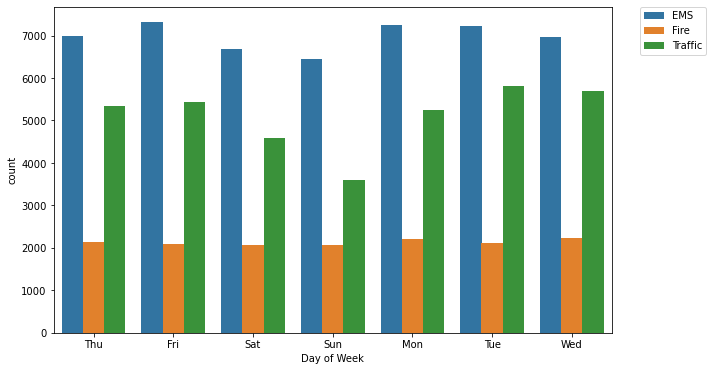

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='Day of Week', data = df, hue='Reasons')
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0) #to put the legend outside of plot

**11. Visualizing the same data Month wise**

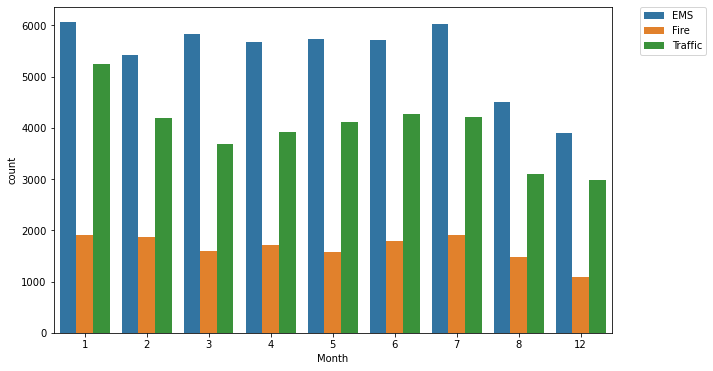

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='Month', data=df, hue='Reasons')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

Notice, above plot is missing some months, so let's see if we can fill in this information in another way, possibly a simple plot that fills in the missing months. In order to do this, we'll need to do some work with pandas.

**12. Creating a groupby object called byMonth, where we can group the dataframe by the month column and use the count() for aggregation.**

In [33]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**13. Creating a simple plot of the dataframe indicating the count of call per month.**

<AxesSubplot:xlabel='Month'>

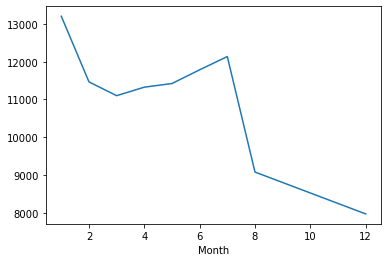

In [34]:
byMonth['lat'].plot()

**14. Creating a new column called 'Date' that contains the date from the timeStamp column.**

In [40]:
df['Date'] = df['timeStamp'].apply(lambda x : x.date())

In [41]:
#check new column
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**15. Grouping the data based on date column and creating a plot of counts of call.**

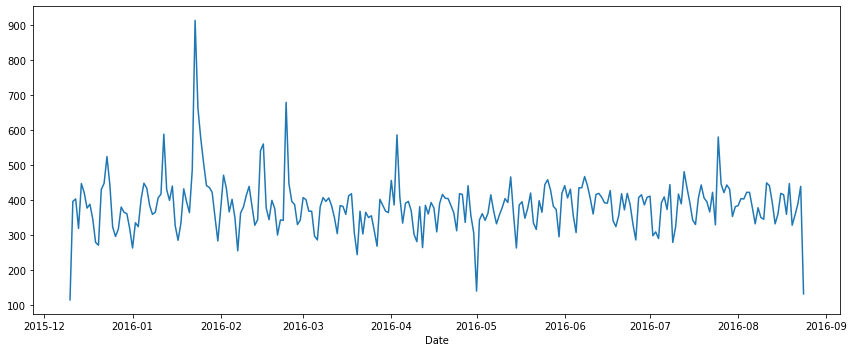

In [44]:
plt.figure(figsize=(12,5))
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

**16. Recreating the above plot but each Reason.**

Text(0.5, 1.0, 'EMS calls per Date')

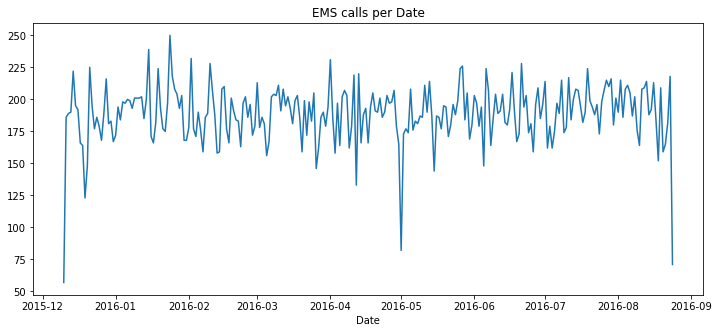

In [50]:
# For EMS
plt.figure(figsize=(12,5))
fig = df[df['Reasons'] == 'EMS'].groupby('Date').count()['lat'].plot()
fig.set_title('EMS calls per Date')

Text(0.5, 1.0, 'Traffic calls per Date')

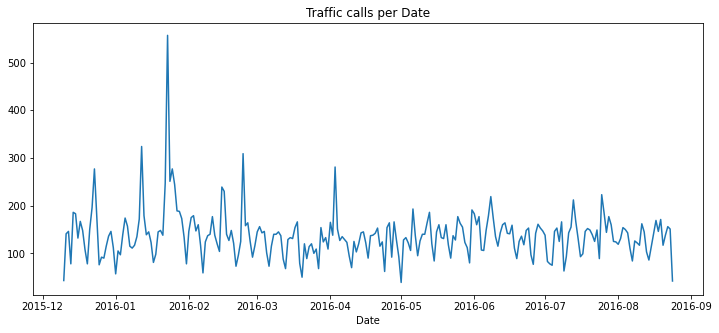

In [51]:
# For Traffic
plt.figure(figsize=(12,5))
fig = df[df['Reasons'] == 'Traffic'].groupby('Date').count()['lat'].plot()
fig.set_title('Traffic calls per Date')

Text(0.5, 1.0, 'Fire calls per Date')

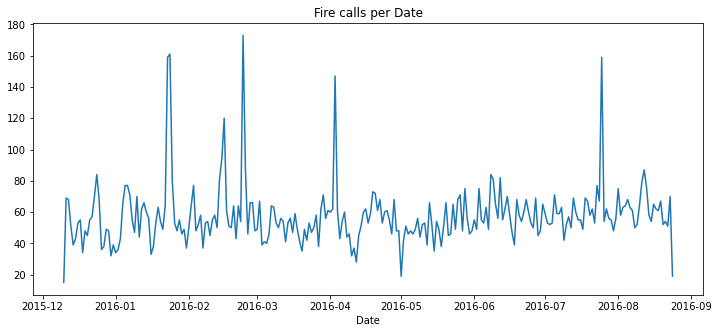

In [52]:
# For EMS
plt.figure(figsize=(12,5))
fig = df[df['Reasons'] == 'Fire'].groupby('Date').count()['lat'].plot()
fig.set_title('Fire calls per Date')

## HeatMaps
---

Converting our data to matrix form using:
* unstack()
* pivot_table()

In [56]:
#using unstack
df.groupby(by=['Day of Week', 'Hour']).count()['Reasons'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [65]:
# using pivot_table
dayHour = pd.pivot_table(df, values='Reasons' , index='Day of Week' , columns='Hour', aggfunc = 'count')
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


**17. Plotting Heatmap.**

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

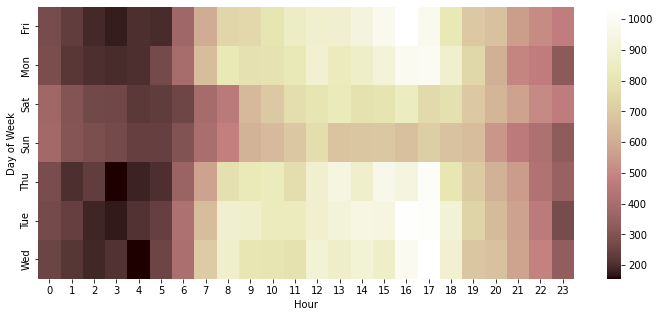

In [69]:
plt.figure(figsize=(12,5))
sns.heatmap(dayHour, cmap='pink')

**18. Custer Map.**

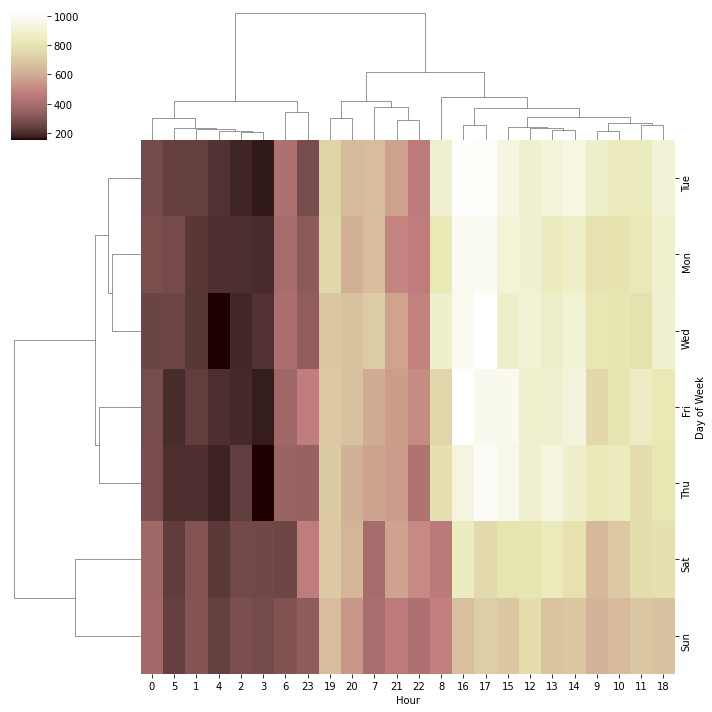

In [70]:
sns.clustermap(dayHour, cmap='pink')

**19. Heatmap for months.**

In [73]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reasons'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

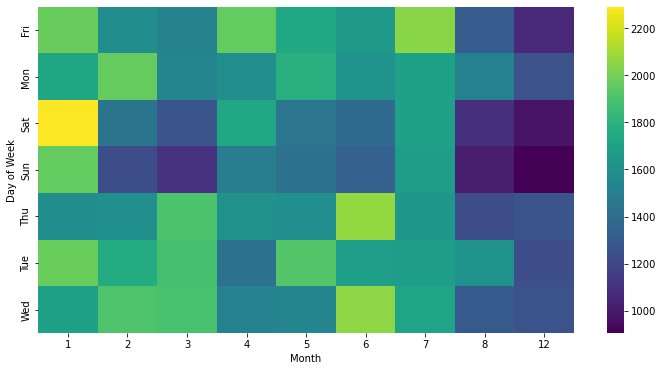

In [75]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap = 'viridis')

<Figure size 864x432 with 0 Axes>

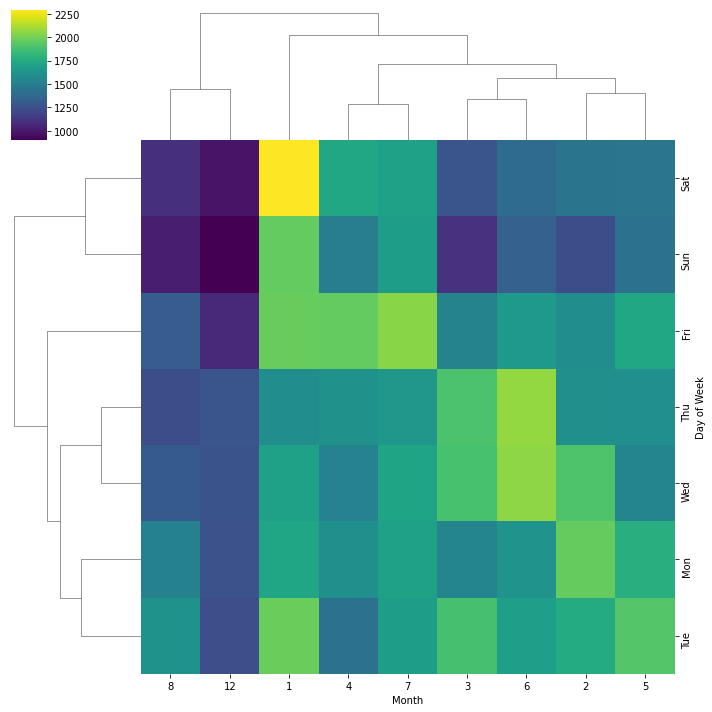

In [76]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth, cmap = 'viridis')

# THANK YOU
---